In [1]:
%%capture
!pip install gymnasium pygame swig box2d -q

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

import torch
from agent import DQNAgent
from utils import running_mean, save_agent, load_agent

import gymnasium as gym
from gym.wrappers import RecordVideo
from gym.envs.box2d.lunar_lander import *

import warnings
warnings.filterwarnings('ignore')

<frozen importlib._bootstrap>:241: DeprecationWarning: builtin type SwigPyPacked has no __module__ attribute
<frozen importlib._bootstrap>:241: DeprecationWarning: builtin type SwigPyObject has no __module__ attribute
<frozen importlib._bootstrap>:241: DeprecationWarning: builtin type swigvarlink has no __module__ attribute
/usr/local/lib/python3.11/dist-packages/pygame/pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists
/usr/local/lib/python3.11/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.11/dist-packages/

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

env_name = 'LunarLander-v2'
env = gym.make(env_name)

BATCH_SIZE = 128
GAMMA = 0.99
TAU = 0.005
LR = 1e-4
MEMORY_LENGTH = 10000
EPS_START = 0.9
EPS_END = 0.05
EPS_DECAY = 1000

agent = DQNAgent(env, device, BATCH_SIZE, GAMMA, TAU, LR, MEMORY_LENGTH, EPS_START, EPS_END, EPS_DECAY)

print('State space:', agent.state_n)
print('Action space:', agent.action_n)
print('Threshold:', env.spec.reward_threshold)

State space: 8
Action space: 4
Threshold: 200


In [3]:
best_score = -np.inf
episodes = 1500
max_iter = 1000
lookback = 100
scores, steps = [], []

for episode in tqdm(range(1, episodes + 1)):

    observation = env.reset()
    done = False
    score = 0
    n_steps = 0

    for i in range(max_iter):

        action = agent.choose_action(observation)
        next_observation, reward, done, _ = env.step(action.item())
        if done:
            next_observation = None
        agent.learn(observation, action, reward, next_observation)
        score += reward
        observation = next_observation
        n_steps += 1
        if done:
            break

    scores.append(score)
    steps.append(n_steps)

    if episode % 10 == 0:
        print('Episode:{} Score:{}'.format(episode, score))

    if score > best_score:
        best_score = score

    if np.mean(scores[-lookback:]) > env.spec.reward_threshold:
        print(f'LunarLander-v2 game successfully solved with an average score of {np.mean(scores[-lookback:]):.2f}')
        save_agent(agent)
        break

print(f'Best score recorded: {best_score}')

  1%|          | 10/1500 [00:06<26:34,  1.07s/it]

Episode:10 Score:-215.37299798052746


  1%|▏         | 20/1500 [00:34<43:43,  1.77s/it]

Episode:20 Score:-433.7775469495793


  2%|▏         | 30/1500 [01:29<2:34:25,  6.30s/it]

Episode:30 Score:-123.72492373431277


  3%|▎         | 40/1500 [02:31<2:35:37,  6.40s/it]

Episode:40 Score:-131.1669017141513


  3%|▎         | 50/1500 [03:16<1:48:54,  4.51s/it]

Episode:50 Score:-78.95136702208066


  4%|▍         | 60/1500 [04:07<2:18:00,  5.75s/it]

Episode:60 Score:-55.394414010975126


  5%|▍         | 70/1500 [04:50<1:07:04,  2.81s/it]

Episode:70 Score:-67.3194342518926


  5%|▌         | 80/1500 [05:15<57:37,  2.43s/it]  

Episode:80 Score:-12.492961871393263


  6%|▌         | 90/1500 [06:13<2:16:40,  5.82s/it]

Episode:90 Score:-108.38887153238589


  7%|▋         | 100/1500 [07:02<1:55:35,  4.95s/it]

Episode:100 Score:-116.63493150582423


  7%|▋         | 110/1500 [07:36<1:17:55,  3.36s/it]

Episode:110 Score:-96.69139544852293


  8%|▊         | 120/1500 [08:16<1:52:26,  4.89s/it]

Episode:120 Score:-56.383762724007255


  9%|▊         | 130/1500 [09:06<1:36:57,  4.25s/it]

Episode:130 Score:-119.63225704418231


  9%|▉         | 140/1500 [09:47<1:27:26,  3.86s/it]

Episode:140 Score:-51.6409707540927


 10%|█         | 150/1500 [10:29<1:54:24,  5.08s/it]

Episode:150 Score:-23.98899273014517


 11%|█         | 160/1500 [11:25<2:14:58,  6.04s/it]

Episode:160 Score:23.686490558961214


 11%|█▏        | 170/1500 [12:08<1:22:29,  3.72s/it]

Episode:170 Score:230.15817052363332


 12%|█▏        | 180/1500 [12:30<56:22,  2.56s/it]

Episode:180 Score:237.88131517981023


 13%|█▎        | 190/1500 [12:53<53:39,  2.46s/it]

Episode:190 Score:229.9514364909246


 13%|█▎        | 200/1500 [13:22<52:29,  2.42s/it]

Episode:200 Score:218.07693269834775


 14%|█▍        | 210/1500 [13:49<54:28,  2.53s/it]

Episode:210 Score:254.36941343883572


 15%|█▍        | 220/1500 [14:14<52:17,  2.45s/it]

Episode:220 Score:219.56739108781665


 15%|█▌        | 230/1500 [14:56<1:16:14,  3.60s/it]

Episode:230 Score:-42.330369412195104


 16%|█▌        | 240/1500 [15:33<1:14:18,  3.54s/it]

Episode:240 Score:197.79886814851835


 17%|█▋        | 250/1500 [15:55<42:50,  2.06s/it]

Episode:250 Score:7.139146964729761


 17%|█▋        | 260/1500 [16:15<59:30,  2.88s/it]

Episode:260 Score:108.95328487661003


 18%|█▊        | 270/1500 [16:33<36:43,  1.79s/it]

Episode:270 Score:-23.86856317104254


 19%|█▊        | 280/1500 [16:46<23:40,  1.16s/it]

Episode:280 Score:-39.77140769704085


 19%|█▉        | 290/1500 [17:01<30:18,  1.50s/it]

Episode:290 Score:278.2527161033428


 20%|██        | 300/1500 [17:18<31:38,  1.58s/it]

Episode:300 Score:-50.87747812472648


 21%|██        | 310/1500 [17:33<22:03,  1.11s/it]

Episode:310 Score:-71.3948253029188


 21%|██▏       | 320/1500 [17:55<31:28,  1.60s/it]

Episode:320 Score:230.83592920509264


 22%|██▏       | 330/1500 [18:20<43:26,  2.23s/it]

Episode:330 Score:252.56485734818875


 23%|██▎       | 340/1500 [18:37<28:59,  1.50s/it]

Episode:340 Score:-66.72305458112368


 23%|██▎       | 350/1500 [19:22<1:39:05,  5.17s/it]

Episode:350 Score:2.6787206952665317


 24%|██▍       | 360/1500 [20:19<1:49:57,  5.79s/it]

Episode:360 Score:-39.060828170455004


 25%|██▍       | 370/1500 [21:21<1:56:14,  6.17s/it]

Episode:370 Score:-25.737013119129127


 25%|██▌       | 380/1500 [22:15<1:36:13,  5.16s/it]

Episode:380 Score:119.7542501485583


 26%|██▌       | 390/1500 [22:57<1:15:04,  4.06s/it]

Episode:390 Score:189.05372476406978


 27%|██▋       | 400/1500 [23:28<55:34,  3.03s/it]  

Episode:400 Score:-75.18551795724237


 27%|██▋       | 410/1500 [24:13<1:16:35,  4.22s/it]

Episode:410 Score:-112.07677902134557


 28%|██▊       | 420/1500 [24:38<42:42,  2.37s/it]

Episode:420 Score:40.37149708917434


 29%|██▊       | 430/1500 [25:09<48:57,  2.75s/it]

Episode:430 Score:200.8166435133757


 29%|██▉       | 440/1500 [25:32<42:57,  2.43s/it]

Episode:440 Score:247.50492053659613


 30%|███       | 450/1500 [25:57<44:40,  2.55s/it]

Episode:450 Score:164.33025949737367


 31%|███       | 460/1500 [26:24<41:38,  2.40s/it]

Episode:460 Score:253.4736601658495


 31%|███▏      | 470/1500 [26:51<45:47,  2.67s/it]

Episode:470 Score:226.12290220875093


 32%|███▏      | 480/1500 [27:13<34:13,  2.01s/it]

Episode:480 Score:241.97751792964237


 33%|███▎      | 490/1500 [27:33<31:09,  1.85s/it]

Episode:490 Score:-29.389470478760046


 33%|███▎      | 500/1500 [27:57<44:49,  2.69s/it]

Episode:500 Score:193.8779888249258


 34%|███▍      | 510/1500 [28:23<37:56,  2.30s/it]

Episode:510 Score:220.78891255558398


 35%|███▍      | 520/1500 [28:46<42:21,  2.59s/it]

Episode:520 Score:133.26490304966194


 35%|███▌      | 530/1500 [29:07<34:58,  2.16s/it]

Episode:530 Score:240.04864072058737


 36%|███▌      | 540/1500 [29:54<1:24:21,  5.27s/it]

Episode:540 Score:-56.05574589345637


 37%|███▋      | 550/1500 [30:45<1:32:06,  5.82s/it]

Episode:550 Score:-10.103688579021329


 37%|███▋      | 560/1500 [31:03<38:42,  2.47s/it]

Episode:560 Score:185.96232433354945


 38%|███▊      | 570/1500 [31:30<37:25,  2.41s/it]

Episode:570 Score:176.0779047000192


 39%|███▊      | 580/1500 [32:00<48:06,  3.14s/it]

Episode:580 Score:227.9724887751276


 39%|███▉      | 590/1500 [32:36<59:39,  3.93s/it]

Episode:590 Score:-41.639141446529045


 40%|████      | 600/1500 [33:01<36:20,  2.42s/it]

Episode:600 Score:251.254007530415


 41%|████      | 610/1500 [33:22<36:45,  2.48s/it]

Episode:610 Score:233.41190897349114


 41%|████▏     | 620/1500 [33:42<29:07,  1.99s/it]

Episode:620 Score:252.1621975162949


 42%|████▏     | 630/1500 [34:12<39:47,  2.74s/it]

Episode:630 Score:225.96001935841514


 43%|████▎     | 640/1500 [34:32<33:39,  2.35s/it]

Episode:640 Score:226.05340345040622


 43%|████▎     | 650/1500 [34:54<39:35,  2.79s/it]

Episode:650 Score:244.27935076736105


 44%|████▍     | 660/1500 [35:16<31:38,  2.26s/it]

Episode:660 Score:225.56620652677788


 45%|████▍     | 670/1500 [35:35<17:38,  1.28s/it]

Episode:670 Score:-27.43048320660796


 45%|████▍     | 670/1500 [35:36<44:06,  3.19s/it]

LunarLander-v2 game successfully solved with an average score of 201.37
Agent saved to model_weights/dqn_agent
Best score recorded: 300.4100980123717


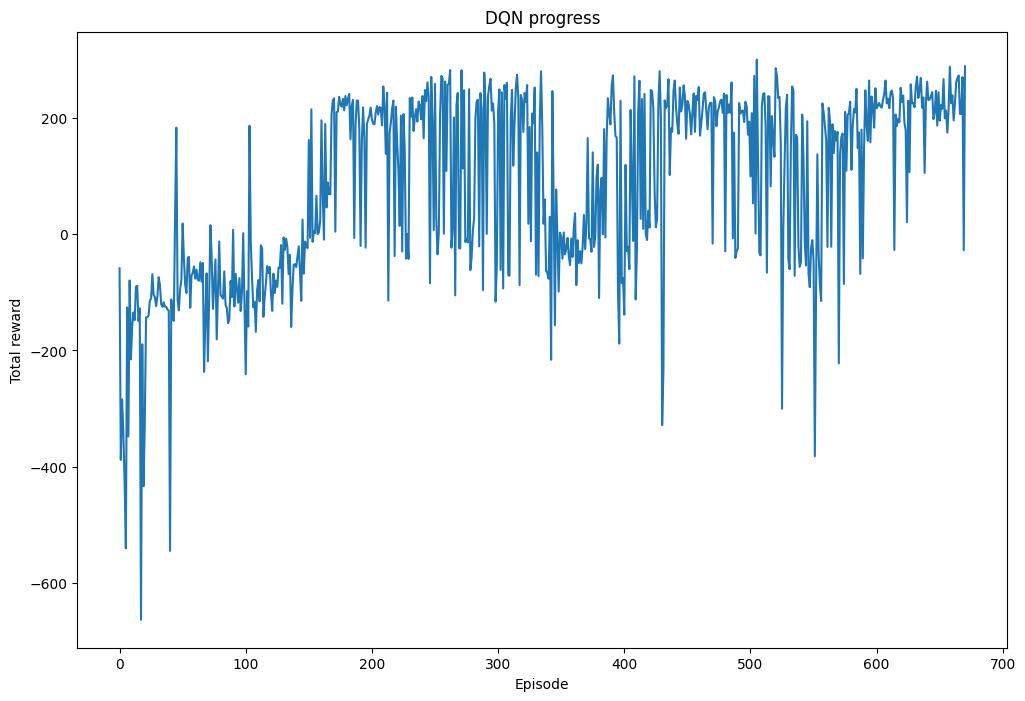

In [5]:
fig = plt.figure(figsize=(12, 8))
plt.plot(scores)
plt.title('DQN progress')
plt.xlabel('Episode')
plt.ylabel('Total reward')
plt.show()
fig.savefig('images/DQN total rewards', dpi=600)

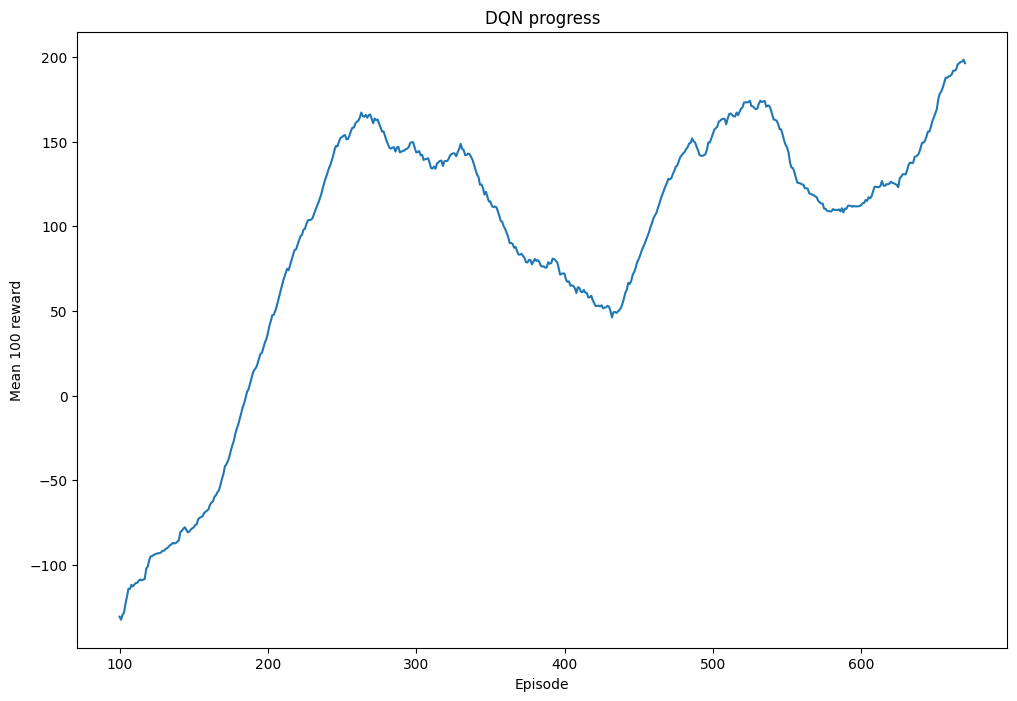

In [6]:
N = 100
mean_rewards = running_mean(scores, N)

fig = plt.figure(figsize=(12, 8))
plt.plot(range(N, len(mean_rewards) + N), mean_rewards)
plt.title('DQN progress')
plt.xlabel('Episode')
plt.xticks(np.arange(N, len(mean_rewards) + N + 1, 100))
plt.ylabel(f'Mean {N} reward')
plt.show()
fig.savefig('images/DQN mean rewards', dpi=600)

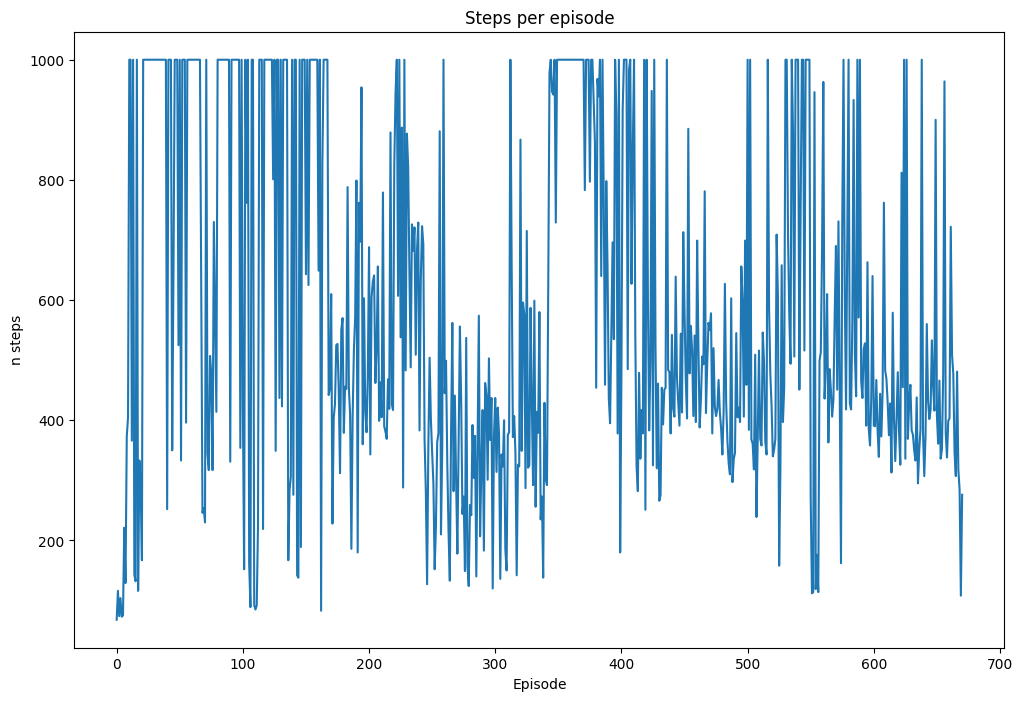

In [7]:
fig = plt.figure(figsize=(12, 8))
plt.plot(steps)
plt.title('Steps per episode')
plt.xlabel('Episode')
plt.ylabel('n steps')
plt.show()
fig.savefig('images/Steps per episode', dpi=600)

In [8]:
env_name = 'LunarLander-v2'
env = gym.make(env_name)

agent = DQNAgent(env, device)
load_agent(agent)

Agent's policy loaded


In [23]:
observation = env.reset()

env = RecordVideo(env,
                  video_folder="video",
                  name_prefix="lunar-lander-dqn")

done = False
total_reward = 0

while not done:
    action = agent.choose_action(observation)
    observation, reward, done, _ = env.step(action.item())
    total_reward += reward

env.close()
print(f'Total reward for a trained agent: {total_reward}')

Total reward for a trained agent: 243.9743422568011
